<img src="imagenes/ia.png", width="200" \>
# Comparación de diferentes clasificadores

[**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/).

En esta libreta se muestra para 3 conjuntos de datos artificiales bidimensionales, la forma en que se realiza la clasificación con distintos métodos. Principalmente lo hacemos para poder sacar conclusiones sobre en que situaciones un método puede ser mejor que otros, y que está haciendo internamente.

Codigo obtenido de la documentación de scikit-learn, el cual se puede consultar [aquí](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [1]:
# El de base
import numpy as np

# Las gráficas
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Para separar los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

# Para normalizar los datos (desviación estandar)
from sklearn.preprocessing import StandardScaler

# Los conjuntos de datos artificiales típicos para probar clasificadores
from sklearn.datasets import make_moons, make_circles, make_classification

# Los métodos de aprendizaje a utilizar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline


## 1. Generando los 3 conjuntos de datos

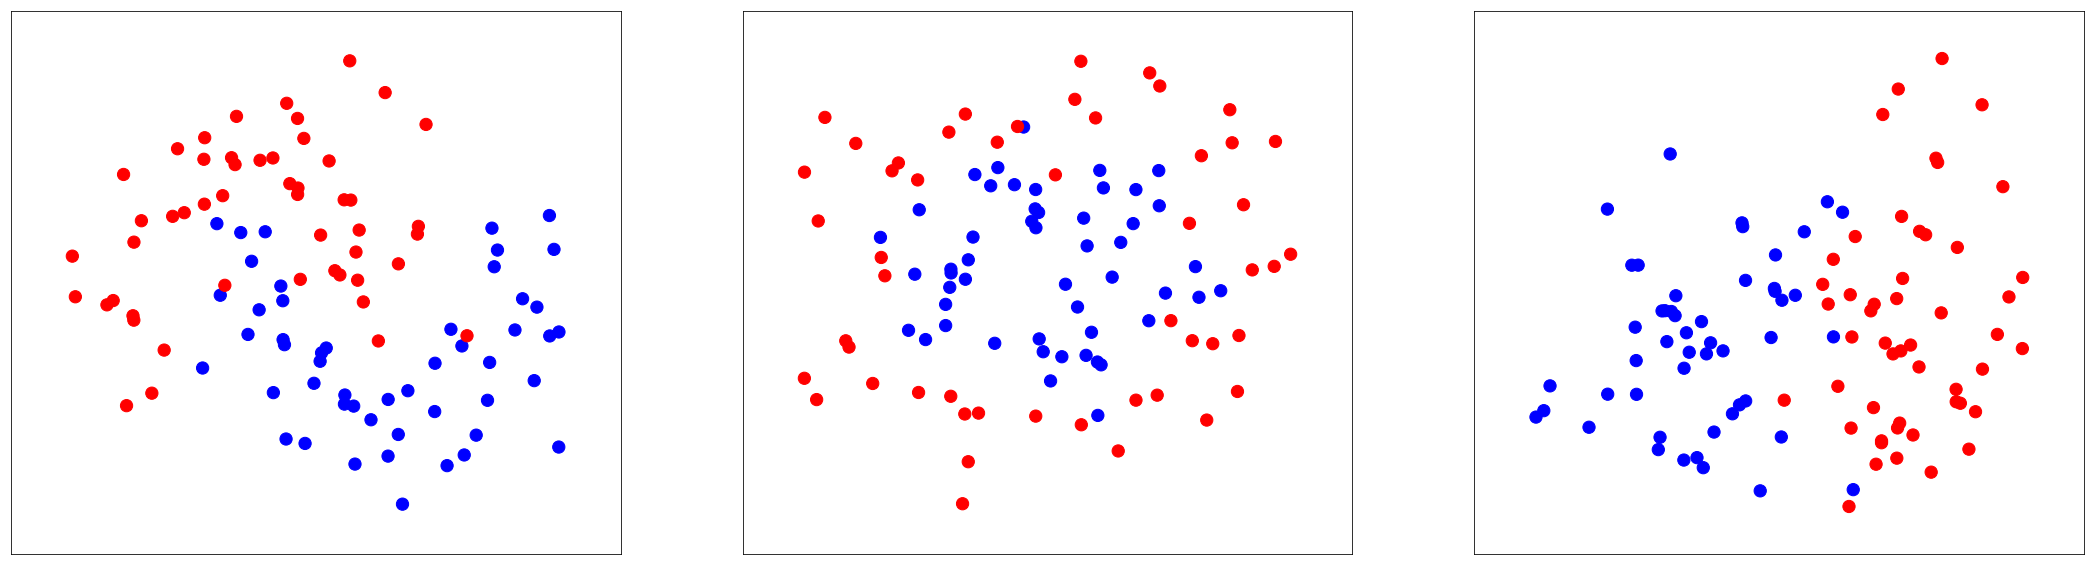

In [2]:

# Del modulo para general conjuntos de datos artificiales, para hacer conjuntos de lunas y circulos:
lunas = make_moons(noise=0.3, random_state=0)
circulos = make_circles(noise=0.2, factor=0.5, random_state=1)

# Ahora generamos un conjunto de datos linealmente separables
X, y = make_classification(n_features=2,             #  Dos dimensiones para poderlos graficar 
                           n_redundant=0,            #  Sin dimensiones redundantes, no nos interesa probar esto ahora
                           n_informative=2,          #  Las dos dimensiones informativas (no correlacionadas)
                           random_state=1,           #  Semilla, siempre la misma para que todos tengan los mismos resultados
                           n_clusters_per_class=1)   #  Una sola forma por clase para hacerlo más sencillo

# Le agregamos ruido a la separación lineal (algunos puntos mal clasificados)
rng = np.random.RandomState(2)           #  Un generados de números pseudoaleatorios con la semilla impuesta
X += 2 * rng.uniform(size=X.shape)       #  A cada punto se le suma un error con una distribución uniforme en ambas dimensiones
lineal = (X, y)

datasets = [lunas, circulos, lineal]    # Una lista de tuplas (X, y)

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(30, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
figure.subplots_adjust(left=.02, right=.98)    
plt.show()


## 2. Define la bateria de clasificadores

In [3]:
titulos = [u"Vecinos próximos", "SVM lineal", "SVM gaussiano", u"Árbol de desición",
           u"Bosques aleatórios", "AdaBoost", "Naive Bayes", "Discriminante lineal",
           "Discriminante cuadrátco"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


## 3. Generando la clasificación con cada método diferente

Vamos a generar por cada conjunto de datos datos de entrenamiento y prueba, y aparte vamos a clasificar todos los datos dentro del meshgrid, para asignarles colores en el fondo, que nos permitan visualizar el tipo de particiones del plano que se genera con cada uno de los métodos de clasificación

Base de datos 0


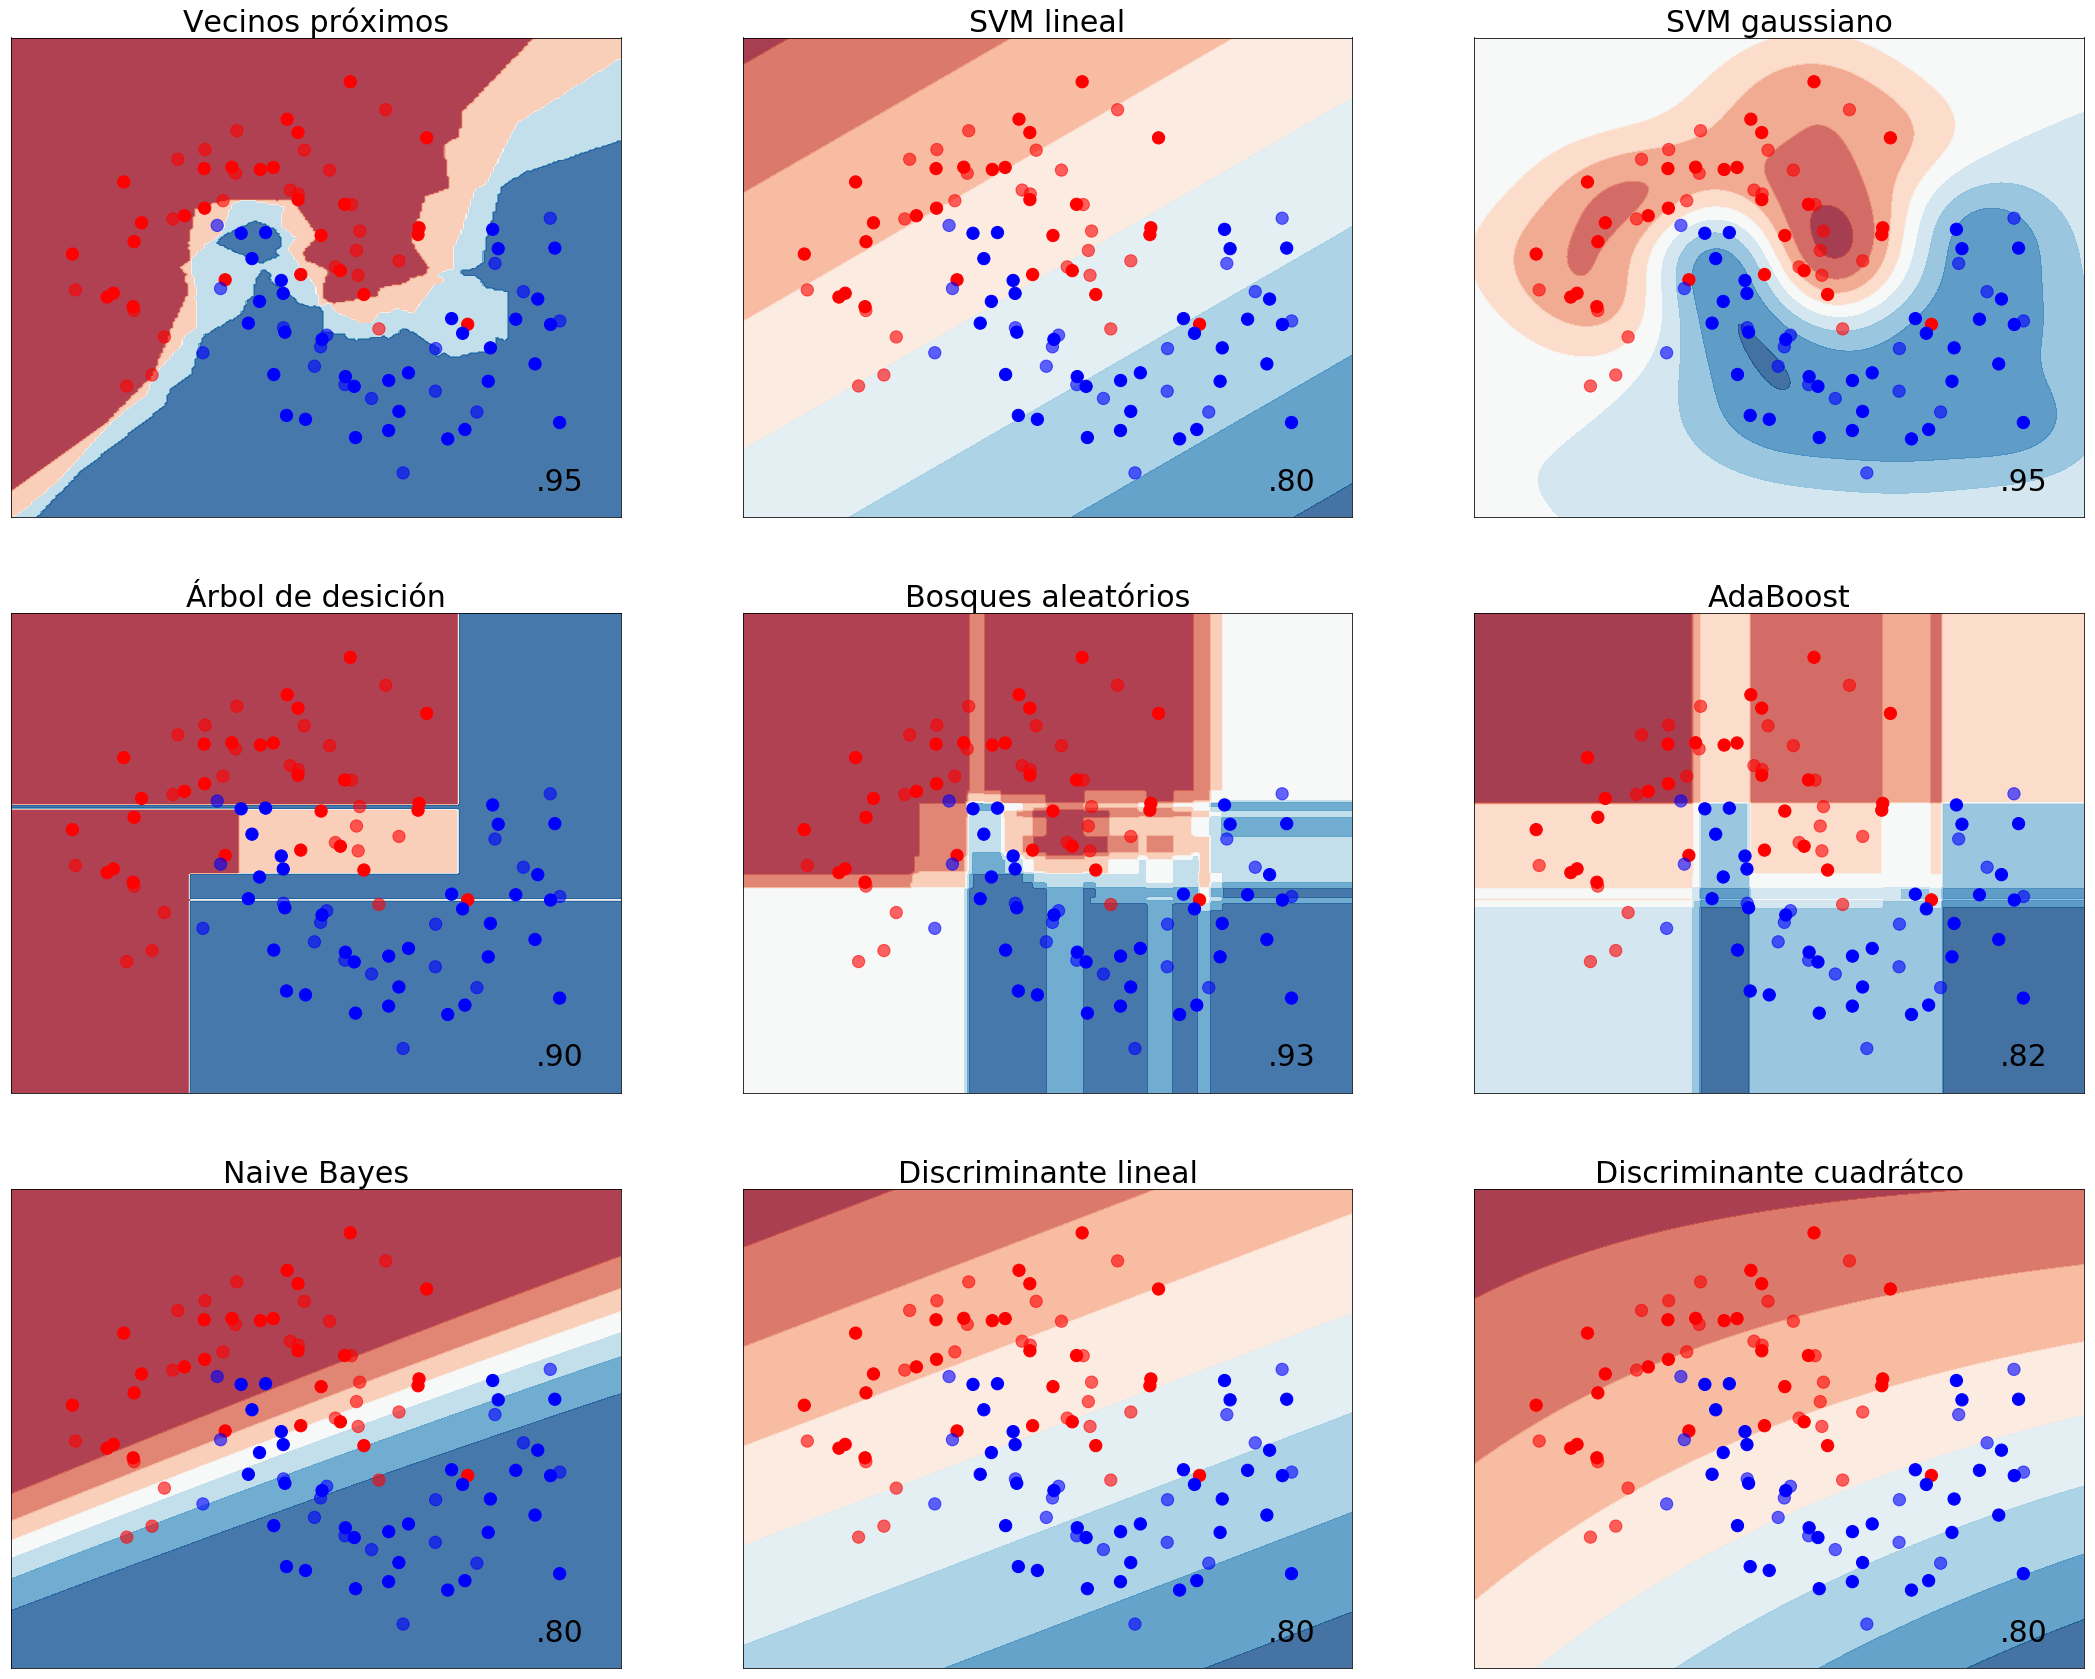

Base de datos 1


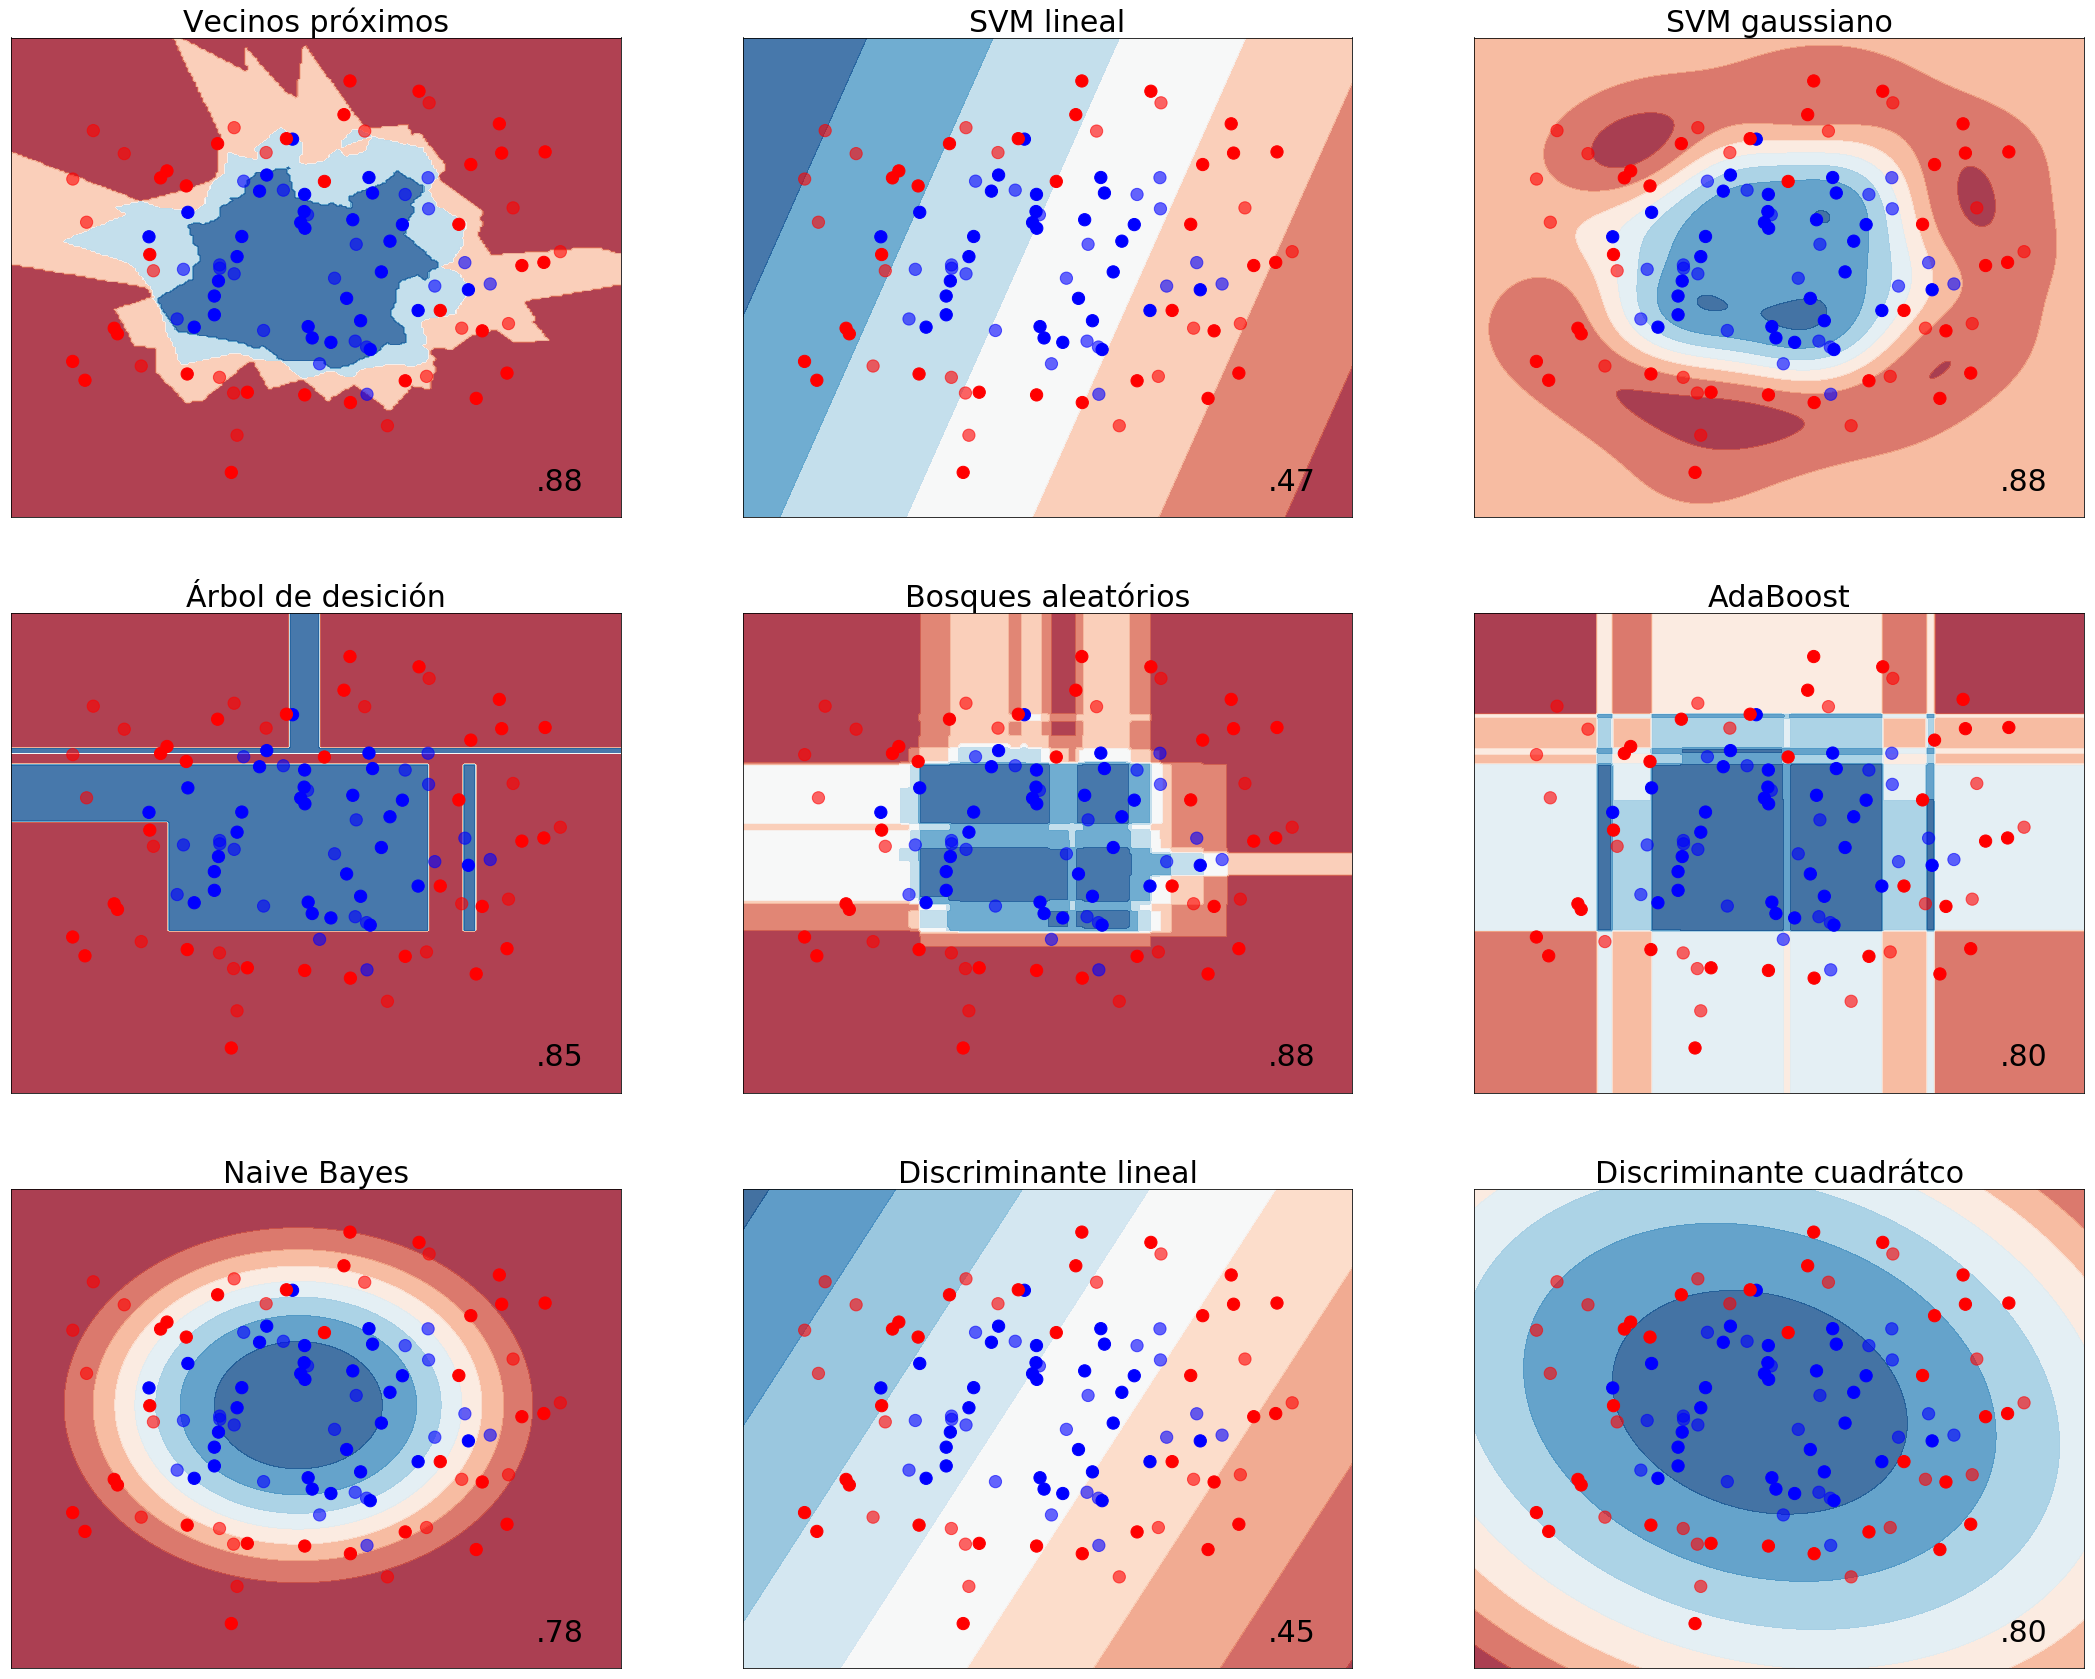

Base de datos 2


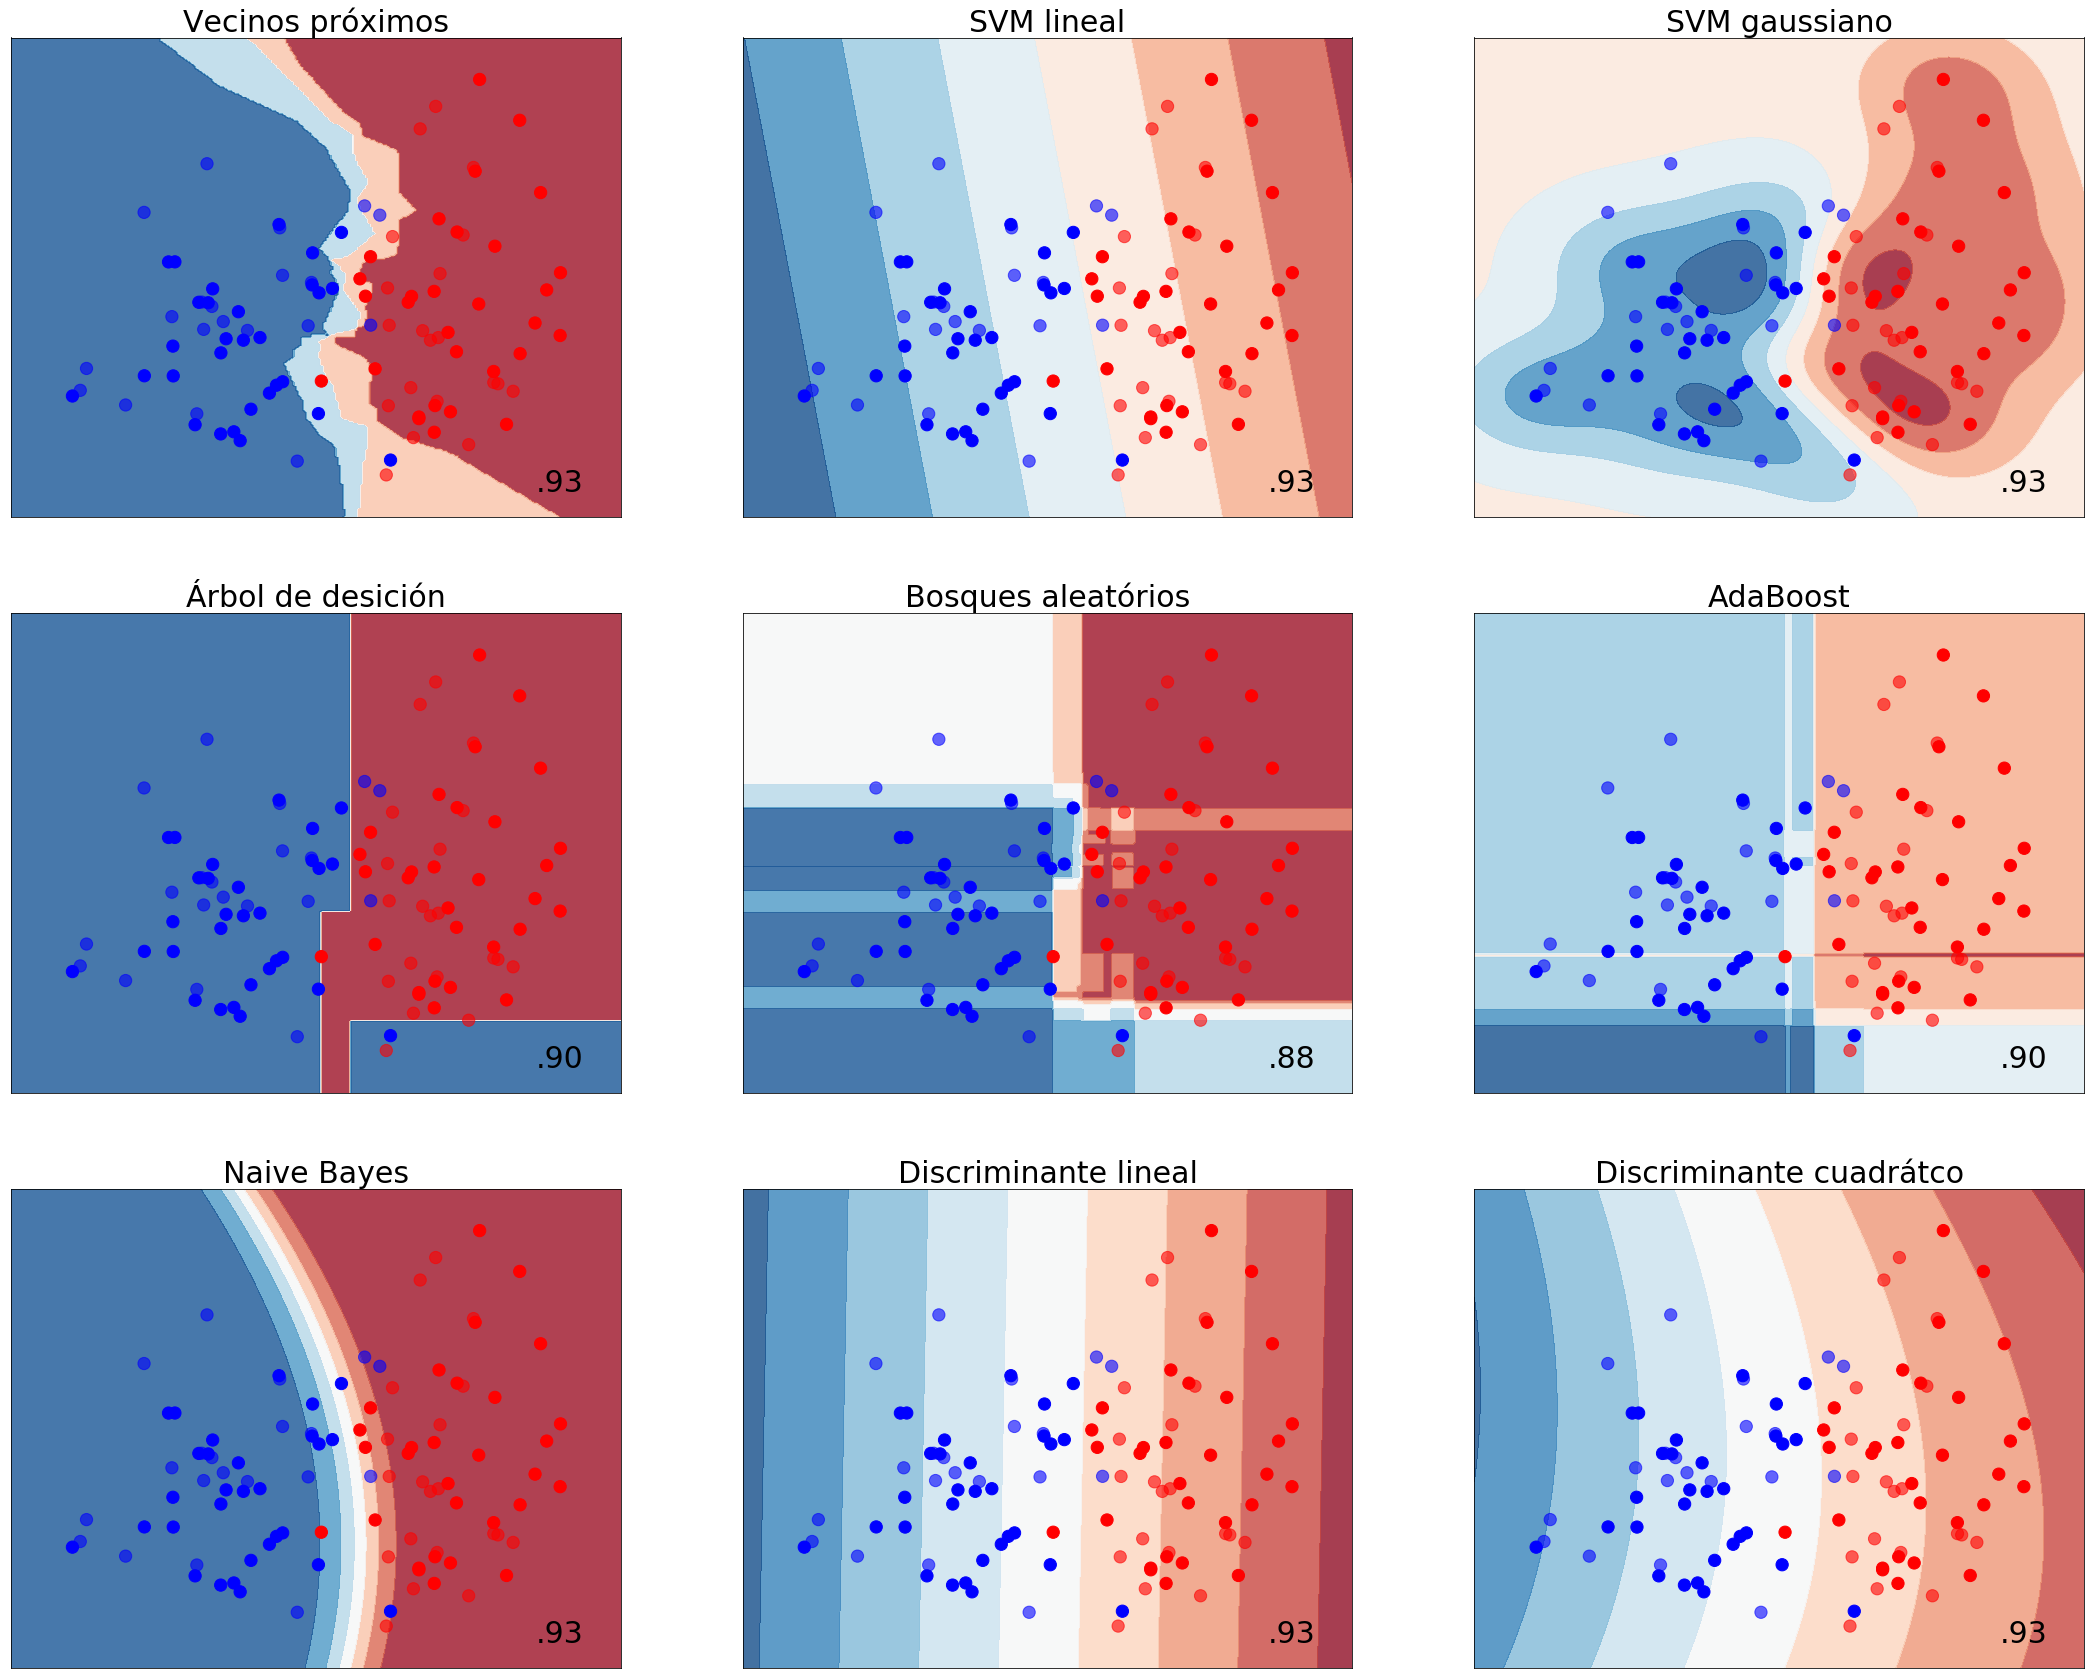

In [25]:
# Colores brillantes
cm = plt.cm.RdBu
cm_escala = ListedColormap(['#FF0000', '#0000FF'])

for (cual, ds) in enumerate(datasets):
    
    print("Base de datos {}".format(cual))
    figure = plt.figure(figsize=(30, 30))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # Dividir el conjunto en un conjunto de entrenamiento y otro de aprendizaje
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    # Meshgrid para clasificar toda la región y pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, (titulo, clf)) in enumerate(zip(titulos, classifiers)):
        
        # Escoge el subplot
        ax = plt.subplot(3, 3, i + 1)
        
        # El entrenamiento!!!!
        clf.fit(X_train, y_train)
        
        # Encuentra el error de validación
        score = clf.score(X_test, y_test)

        # Clasifica cada punto en el meshgrid
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un color a cada punto
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Grafica los datos de entrenamiento y prueba
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titulo, size=30)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()


## 4. Generando un conjunto de datos en forma de espiral

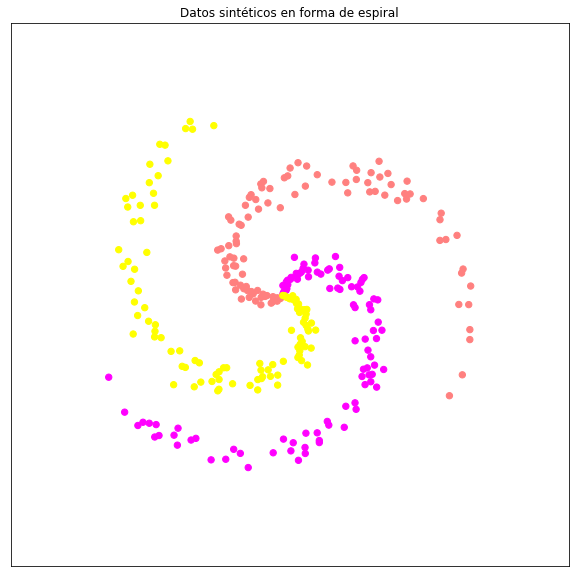

In [13]:
#  Inicialización de datos
np.random.seed(0) # Aseguramos que siempre pasa lo mismo
N = 100 # Ejemplos por clase
D = 2 # Atributos
K = 3 # Clases
X = np.zeros((N * K, D))
Y = np.zeros((N * K, 1), dtype='uint8')

# Genera datos en espiral
for clase in range(K):
  ix = list(range(N*clase, N*(clase+1)))  # Indices para cada clase
  r = np.linspace(0.0, 1, N) 
  t = np.linspace(clase * 4, (clase + 1) * 4, N) + np.random.randn(N) * 0.2 
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  Y[ix] = clase

flat_list = [item for sublist in Y for item in sublist]

#  Grafica datos
figure = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=flat_list, s=40, cmap=plt.cm.spring)
plt.title("Datos sintéticos en forma de espiral")
plt.xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
plt.ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
plt.xticks(())
plt.yticks(())
plt.show()

### Ejercicio:

Prueba los diferentes clasificadores para este conjunto de datos. Recuerda que en este caso tenemos un problema de múltiples clases y los métodos podrían necesitar un ajuste especial. Clasifica un grid con los puntos que permitan estudiar la forma de la partición del esacio, tal como se hizo en el ejemplo.

Revisa la literatura de cada método en caso que no funcionen directamente. Agrega a continuación el código que genera las gráficas.

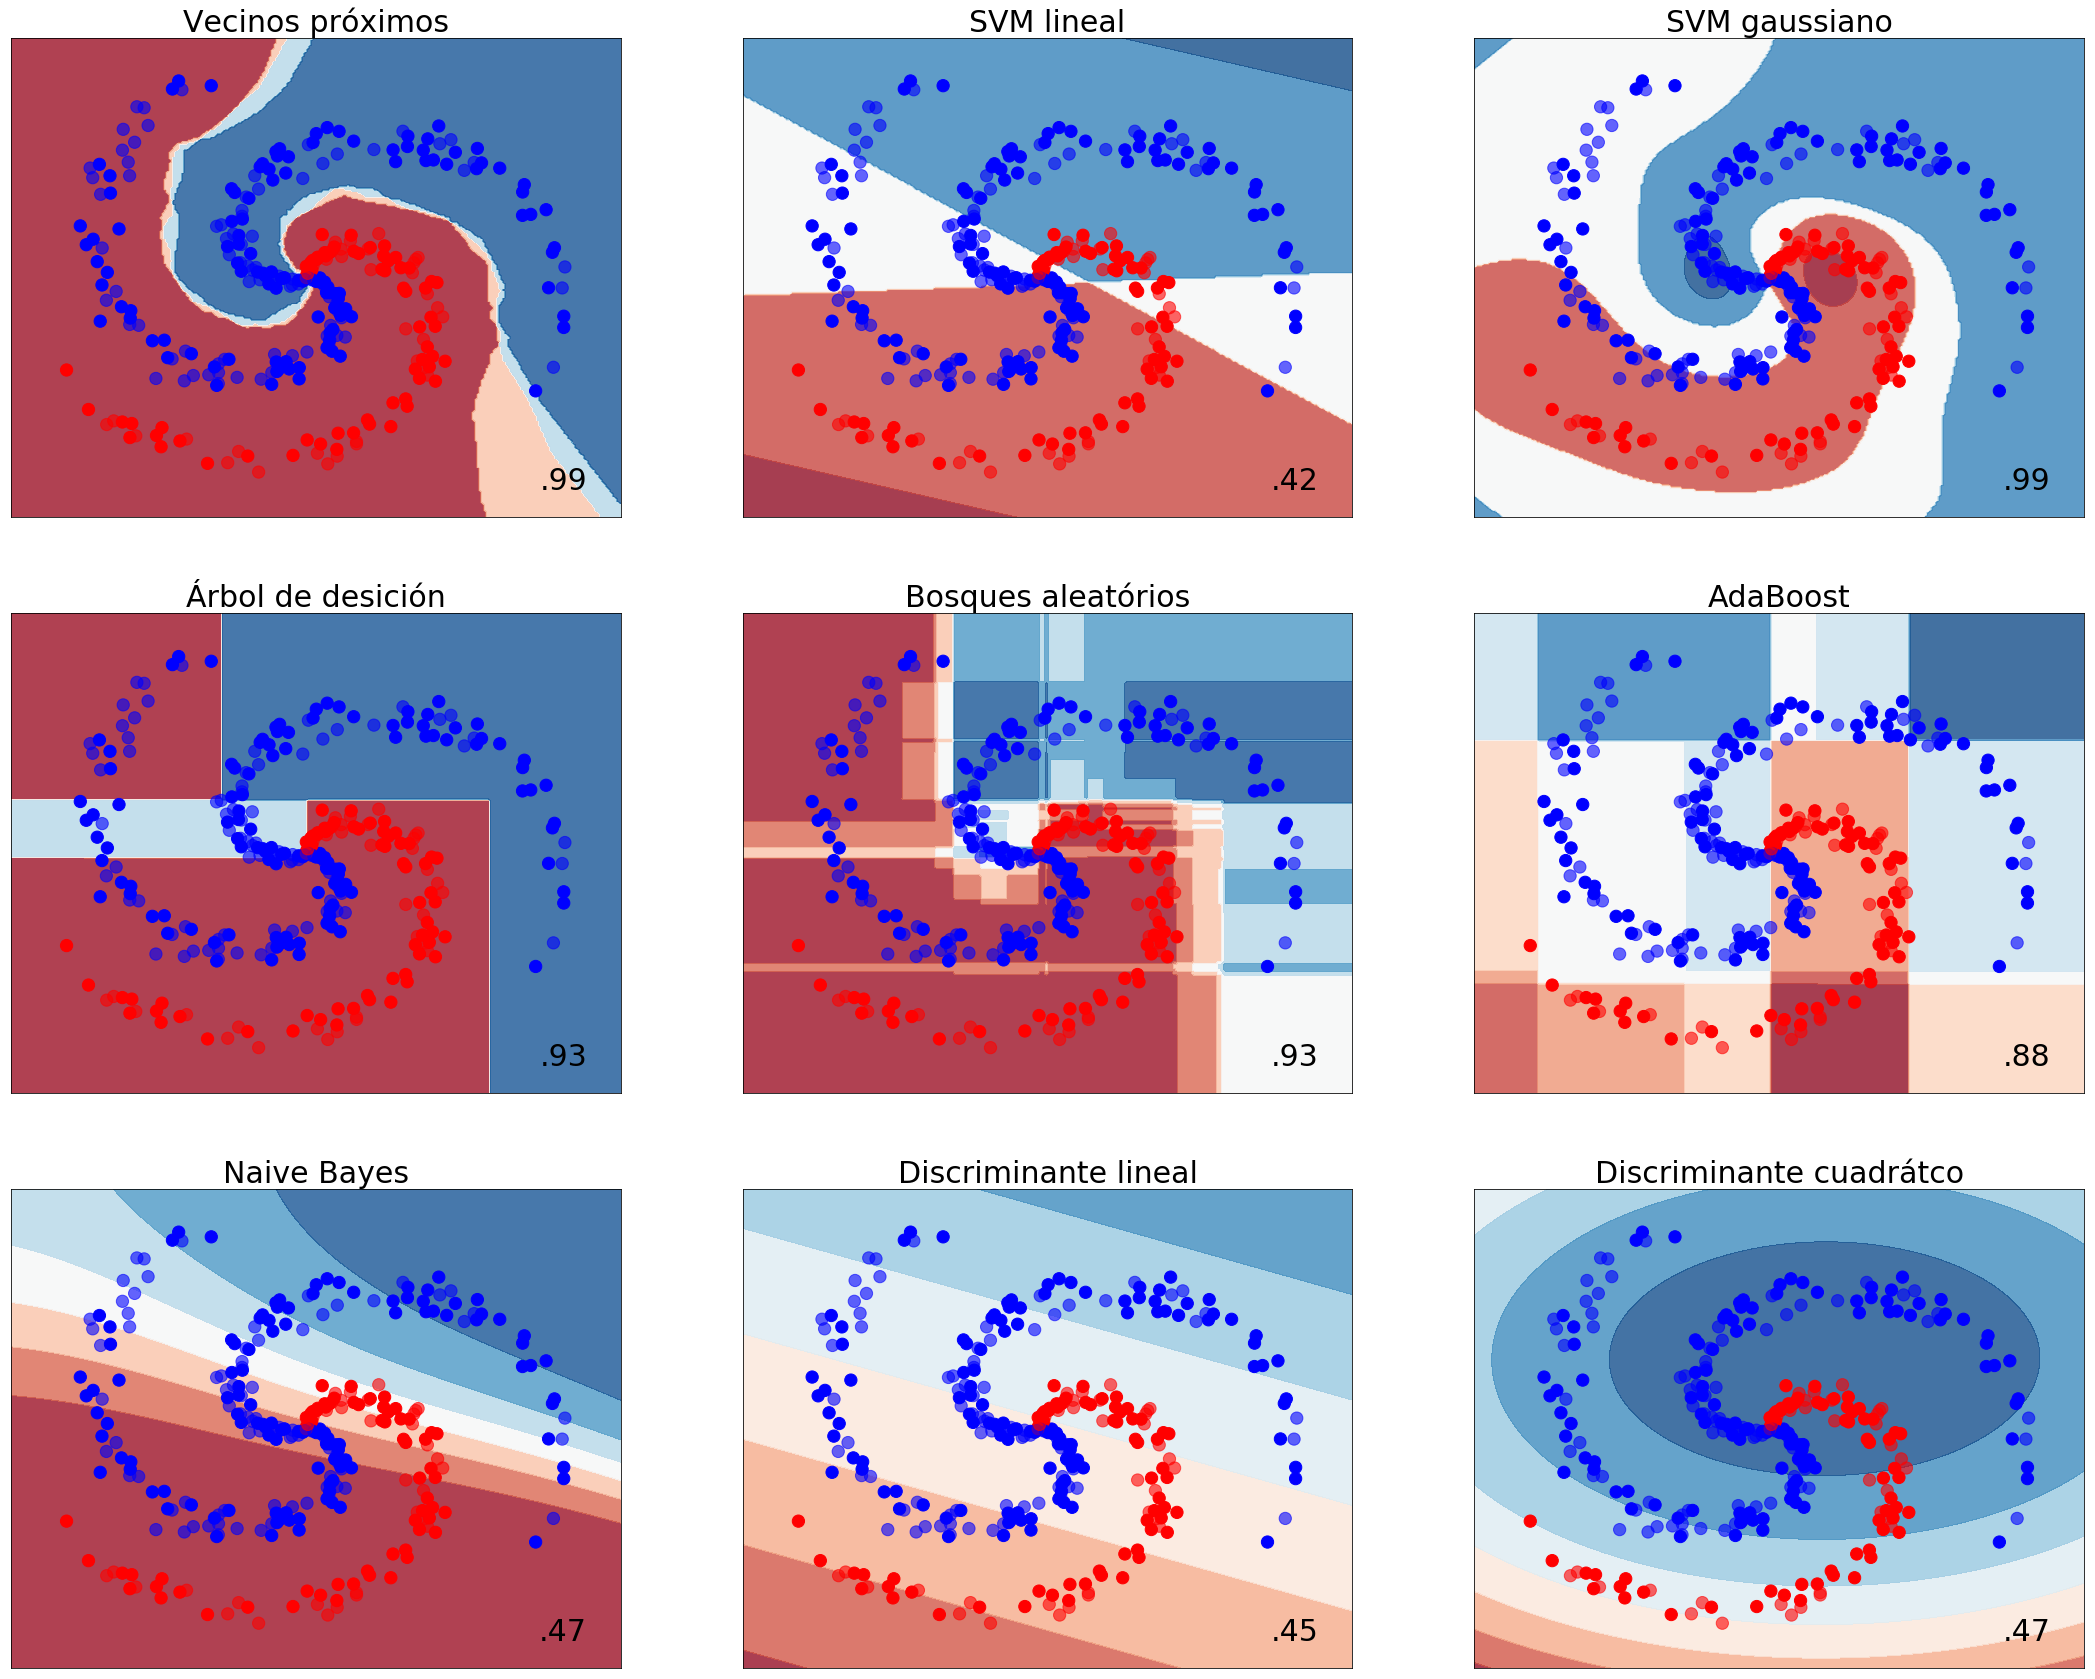

In [24]:
# Agrega aqui tu códgo
titulos = [u"Vecinos próximos", "SVM lineal", "SVM gaussiano", u"Árbol de desición",
           u"Bosques aleatórios", "AdaBoost", "Naive Bayes", "Discriminante lineal",
           "Discriminante cuadrátco"]

classifiers = [
    KNeighborsClassifier(3),

    SVC(kernel="linear", C=0.025, decision_function_shape='ovr'),
    SVC(gamma=2, C=1,decision_function_shape='ovr'),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(tol=1e-3),
    QuadraticDiscriminantAnalysis()]

figure = plt.figure(figsize=(30, 30))

X, y = (X,Y)
X = StandardScaler().fit_transform(X)
y= y.reshape((y.shape[0],))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                     np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

for (i, (titulo, clf)) in enumerate(zip(titulos, classifiers)):

    ax = plt.subplot(3, 3, i + 1)

    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_escala, s=150)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_escala, s=150, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(titulo, size=30)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=30, horizontalalignment='right')

figure.subplots_adjust(left=.02, right=.98)
plt.show()

## Conclusiones

### Ejercicio:

Escribe a continuación tus conlusiones, agreando lo siguiente:

1. Para cada clasificador, ¿Como es la partición del espacio que genera?
    Teniendo en cuanta que los datos estan en forma espiral
    * Vecinos próximos: este se se ajusta mucho a los datos, las particiones se parecen a la distribución de los datos
    * SVM lineal: Pues las particiones no se ajustan bien a los datos por la figura de triangulos. 
    * SVM Gaussiano: las particiones se ajustan bien a los datos, además de que son parecidas a la distribución de los datos pero como que más delgadas a comparación de las de vecinos proximos.
    * Árbol de decisión: supungo que diria que si parece un poco espiral y aunque se parezca poco este tiene un 90% de validación 
    * Bosques aleatórios: la partición de este no toman la forma de espiral de los datos, y tambien obtiene gran porcentaje de exito en la validacion. Supongo que son los cortes y su forma casi adstracta, buen que forman muchos cuadritos o rectangulos que haen que se paresca un poco a los datos.
    * AdaBoost: a pesar que las particione son la mayoria rectangulos y viendo "el vaso medio lleno" con su poca forma espiral obtiene buenos resultados.
    * Naive bayes: las particiones son como cruvas leves, pero no encuentro la relación con la distribución datos.
    * Discriminante lineal: las particiones son como areas que se forman entre lineas paralelas, que estas no se asemejan a la distribución de los datos. 
    * Discriminante cuadratico: las particiones son como de circulos dentro de otro circulo, lo cual de igualmanera no se asemeja a los datos. 
    
2. ¿Para que casos crees que son mejores unos clasificadores a otros?
    ⋅⋅⋅Bueno pensando en los resultados pienso que los vecinos próximos, SVM Gaussiano y bosques aleatórios son los 3 que dieron mejores resultados en una distribución de datos en forma de espiral, pero también los árboles de decisión dio resultados muy buenos a pesar que este no fromaba la espiral y que es para más datos aunque no sea muy rapido en aprendizaje.⋅⋅
3. Existen clasificadores que se comporten más o menos parecido? ¿Los podrías regrupar?
    1. Los clasificadores que tomarón o se asemejarón a la forma de los datos: vecinos proximos, SVM gaussiano, árbol de decision, bosques aleatórios y AdaBoost. 
    2. Los clasificadores que se ajustan lo mas posible a los datos: SVM lineal, Naive bayes, Discriminante lineal y cuadratio.
4. ¿Hay algún clasificador que, vista la evidencia, ni siquiera probarías al principio? ¿Cúal(es? ¿Porqué?
    ⋅⋅⋅Supongo que cada clasificador es bueno si tiene su tipo o forma de datos

